# INDIA SUICIDE RATES 2001 - 2012 EXPLORATORY DATA ANALYSIS 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
# loading the dataset
df = pd.read_csv(r'C:\Users\otien\Downloads\Suicides in India 2001-2012.csv')

In [47]:
# viewing the dataset
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [5]:
# size of the dataset
df.shape

(237519, 7)

In [6]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [7]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [8]:
# checking for null values
df.isnull().head() # returns boolean values

,State,Year,Type_code,Type,Gender,Age_group,Total
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()/len(df)

State        0.0
Year         0.0
Type_code    0.0
Type         0.0
Gender       0.0
Age_group    0.0
Total        0.0
dtype: float64

### Data Pre-processing

In [10]:
# checking for value counts of the columns
df['State'].value_counts()

State
Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: 

In [11]:
# List of unwanted state names
unwanted_states = ['Total (All India)', 'Total (States)', 'Total (Uts)']

# Identify indices of rows to drop
indices_to_drop = df[df['State'].isin(unwanted_states)].index

# Drop the rows by index
df = df.drop(indices_to_drop)
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [12]:
# confirmation that the unwanted states are removed
df['State'].value_counts()

State
Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: count, dtype: int64

In [13]:
df['Age_group'].value_counts()

Age_group
15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    10920
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      118411
Female    118172
Name: count, dtype: int64

In [15]:
df['Type'].value_counts()

Type
Others (Please Specify)                           7263
Illness (Aids/STD)                                4200
By Drowning                                       4200
By touching electric wires                        4200
By Machine                                        4200
                                                  ... 
Graduate                                           840
Middle                                             840
Bankruptcy or Sudden change in Economic Status     350
Not having Children (Barrenness/Impotency          350
By Other means                                     350
Name: count, Length: 69, dtype: int64

In [16]:
df['Type_code'].value_counts()

Type_code
Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          6720
Social_Status             4200
Name: count, dtype: int64

In [17]:
# Causes
df[df['Type_code'] == 'Causes']['Type'].value_counts()

Type
Illness (Aids/STD)                                4200
Love Affairs                                      4200
Paralysis                                         4200
Suspected/Illicit Relation                        4200
Cancer                                            4200
Death of Dear Person                              4200
Poverty                                           4200
Other Causes (Please Specity)                     4200
Unemployment                                      4200
Causes Not known                                  4200
Drug Abuse/Addiction                              4200
Divorce                                           4200
Professional/Career Problem                       4200
Insanity/Mental Illness                           4200
Failure in Examination                            4200
Illegitimate Pregnancy                            4200
Fall in Social Reputation                         4200
Property Dispute                                  4200
Other

In [18]:
# Means adopted
df[df['Type_code'] == 'Means_adopted']['Type'].value_counts()

Type
By Consuming Insecticides                  4200
By Over Alcoholism                         4200
By Fire-Arms                               4200
By Drowning                                4200
By Jumping from (Building)                 4200
By Overdose of sleeping pills              4200
By coming under running vehicles/trains    4200
By Consuming Other Poison                  4200
By Self Infliction of injury               4200
By Hanging                                 4200
By Jumping off Moving Vehicles/Trains      4200
By Fire/Self Immolation                    4200
By Machine                                 4200
By touching electric wires                 4200
By Jumping from (Other sites)              4200
By Other means (please specify)            3850
By Other means                              350
Name: count, dtype: int64

In [19]:
# Professional_Profile
df[df['Type_code'] == 'Professional_Profile']['Type'].value_counts()

Type
Others (Please Specify)              7263
Retired Person                       4200
Unemployed                           4200
Public Sector Undertaking            4200
Service (Private)                    4200
House Wife                           4200
Self-employed (Business activity)    4200
Professional Activity                4200
Student                              4200
Farming/Agriculture Activity         4200
Service (Government)                 4200
Name: count, dtype: int64

In [20]:
# Education Status
df[df['Type_code'] == 'Education_Status']['Type'].value_counts()

Type
Diploma                                     840
No Education                                840
Post Graduate and Above                     840
Middle                                      840
Graduate                                    840
Hr. Secondary/Intermediate/Pre-Universit    840
Primary                                     840
Matriculate/Secondary                       840
Name: count, dtype: int64

In [21]:
# Social_Status
df[df['Type_code'] == 'Social_Status']['Type'].value_counts()

Type
Married            840
Seperated          840
Widowed/Widower    840
Divorcee           840
Never Married      840
Name: count, dtype: int64

In [22]:
df[['Year', 'Total']].groupby('Year', as_index=False).count()

,Year,Total
0,2001,19719
1,2002,19712
2,2003,19708
3,2004,19705
4,2005,19725
5,2006,19708
6,2007,19716
7,2008,19719
8,2009,19708
9,2010,19714


In [23]:
# Number of people who commited suicide in each year from 2001 to 2012
df = df[df['Year'].between(2001, 2012)]
suicide_years = df.groupby('Year')['Total'].sum().reset_index()

suicide_years

,Year,Total
0,2001,542440
1,2002,551980
2,2003,554218
3,2004,568349
4,2005,569545
5,2006,590543
6,2007,613119
7,2008,625014
8,2009,635429
9,2010,672926


### Exploratory Data Analysis (EDA)

### Trend analysis of the total number of suicides from 2001 to 2012

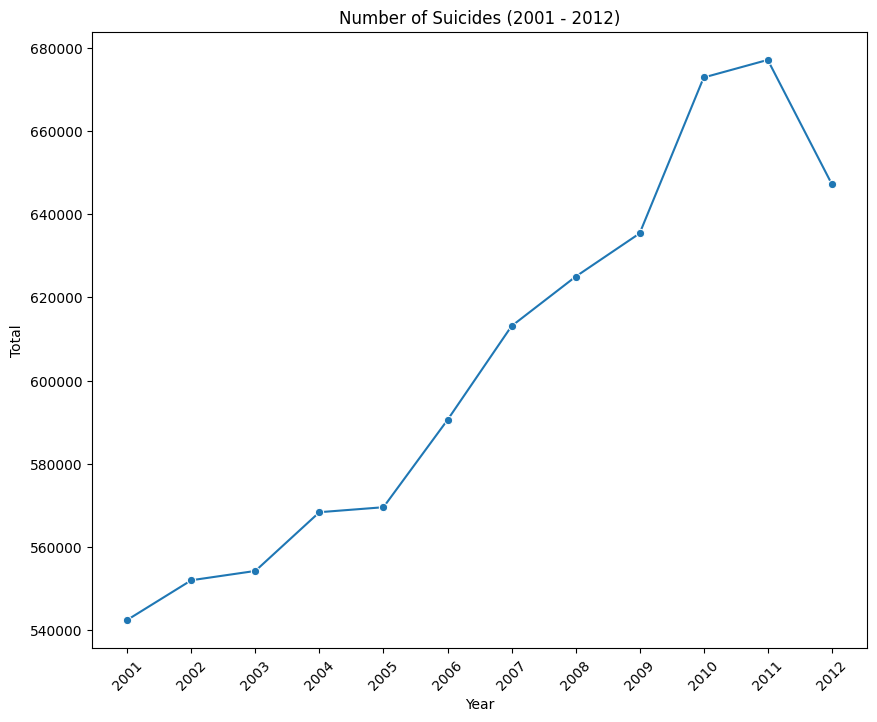

In [24]:
# visualization of the trend and the total number of people who commited suicide from 2001 to 2012
plt.figure(figsize=(10,8))
sns.lineplot(data= suicide_years, x = 'Year', y ='Total', marker='o')
plt.xticks(ticks=range(2001, 2013), rotation=45)
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Number of Suicides (2001 - 2012)')
plt.show();


### Rate of change of suicides over the years

In [55]:
# Calculating the rate of change of suicide over the years
grp_year = df.groupby(['Year', 'Gender'], as_index=False)['Total'].sum()
grp_year

,Year,Gender,Total
0,2001,Female,379645
1,2001,Male,596819
2,2002,Female,369675
3,2002,Male,623973
4,2003,Female,365657
5,2003,Male,631965
6,2004,Female,369297
7,2004,Male,653840
8,2005,Female,368980
9,2005,Male,656221


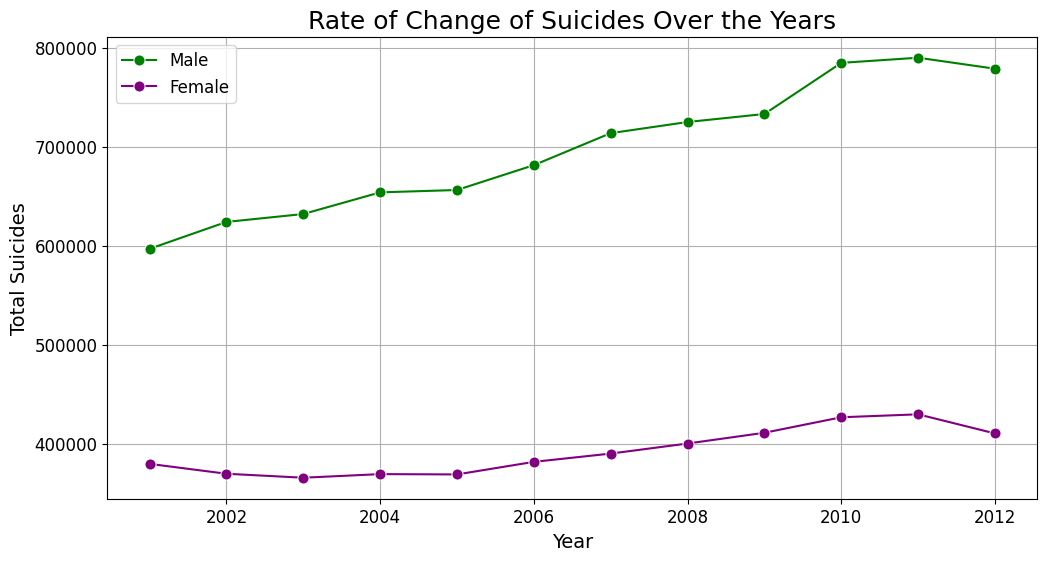

In [53]:
# Plotting the rate of change over the years
plt.figure(figsize=(12, 6))
colors = {'Male': 'green', 'Female': 'purple'}
for gender, color in colors.items():
    sns.lineplot(x='Year', y='Total', data=grp_year[grp_year['Gender'] == gender], 
                 color=color, marker='o', markersize=8, label=gender)

plt.title("Rate of Change of Suicides Over the Years", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Suicides", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Statewise comparison of suicides

In [25]:
# states with the highest number of suicide 
suicide_states = df.groupby('State')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
top_10 = suicide_states.head(10)

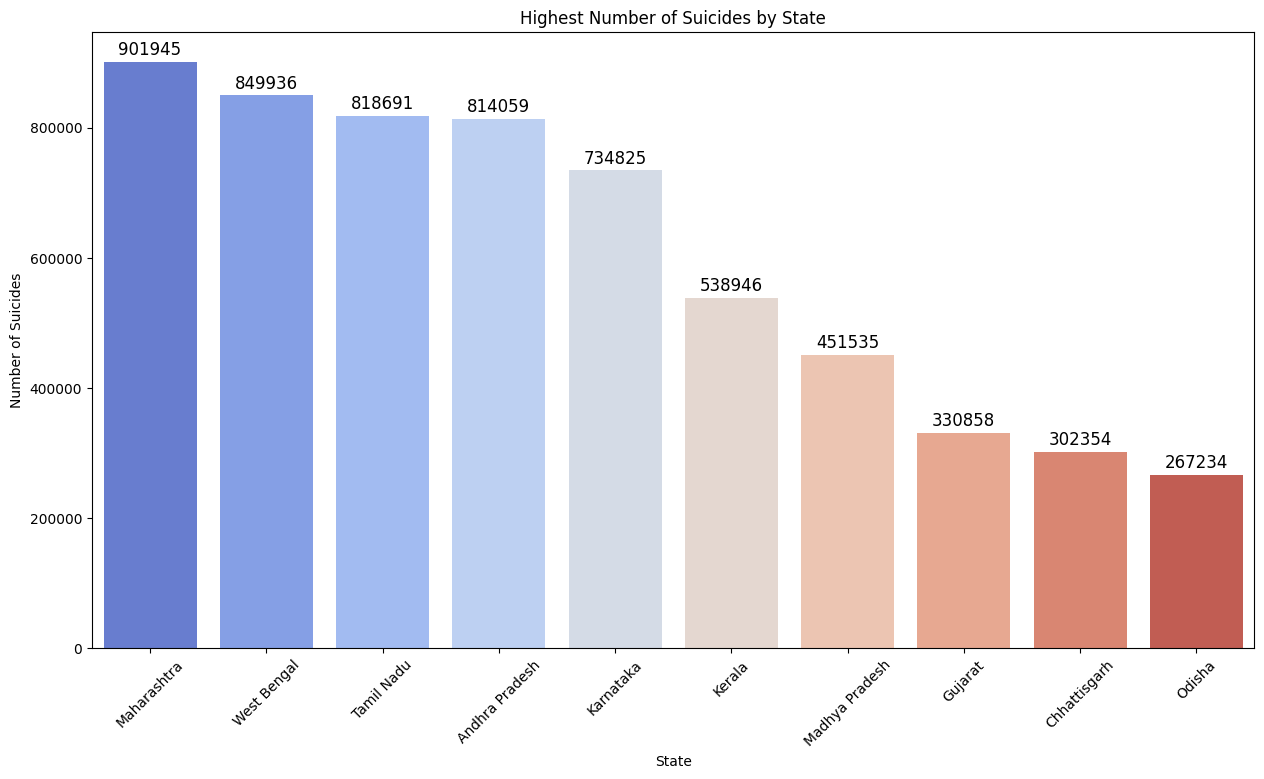

In [26]:
# Plotting the barplot to visualize the states with the highest number of suicides
plt.figure(figsize=(15, 8))
label = sns.barplot(x='State', y='Total', data=top_10, hue='State', palette='coolwarm', dodge=False)

# Adding value labels on the bars
for container in label.containers:
    label.bar_label(container, padding=2, size=12)
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.title('Highest Number of Suicides by State')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

### Total suicides according to gender

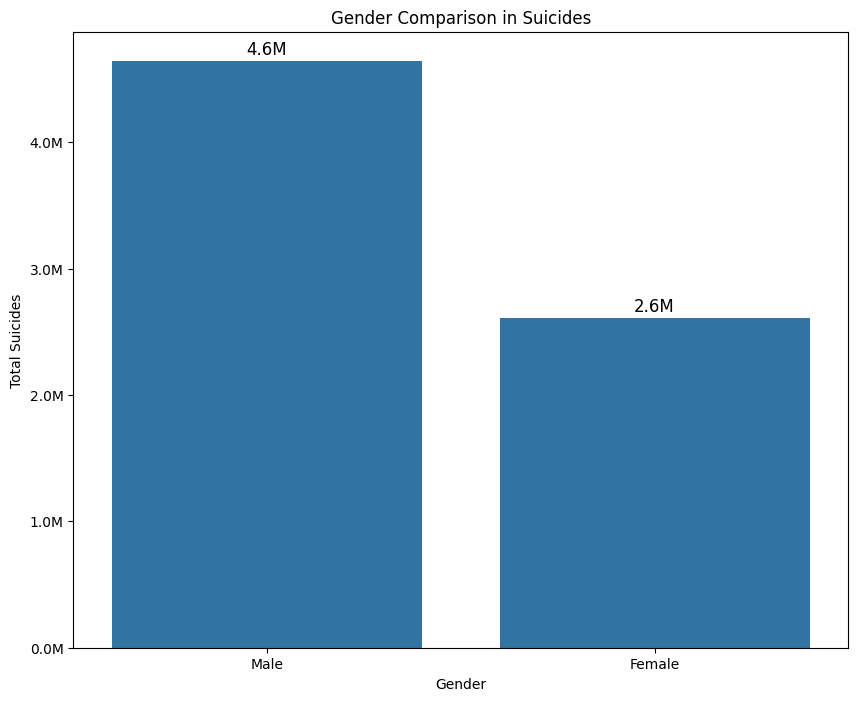

In [27]:
from matplotlib.ticker import FuncFormatter
gender = df.groupby('Gender')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
# Function to format y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Plotting the barplot for gender comparison
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=gender, x='Gender', y='Total')

# Adding value labels on the bars
for container in ax.containers:
    ax.bar_label(container, padding=2, size=12, fmt='%1.1fM', labels=[f'{v * 1e-6:.1f}M' for v in container.datavalues])

# Formatting the y-axis labels
ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.title('Gender Comparison in Suicides')
plt.show()

### Gender comparison over the years

In [28]:
# comparison of gender over the years
years = df.groupby('Year')['Total'].sum()

men_df = df[df['Gender'] == 'Male']
men_year = men_df.groupby('Year')['Total'].sum().to_frame()
men_year.rename(columns={'Total': 'Male'}, inplace= True)

women_df = df[df['Gender'] == 'Female']
women_year = women_df.groupby('Year')['Total'].sum().to_frame()
women_year.rename(columns={'Total':'Female'}, inplace=True)

gender_year = men_year.join(women_year)
gender_year.reset_index(inplace=True)

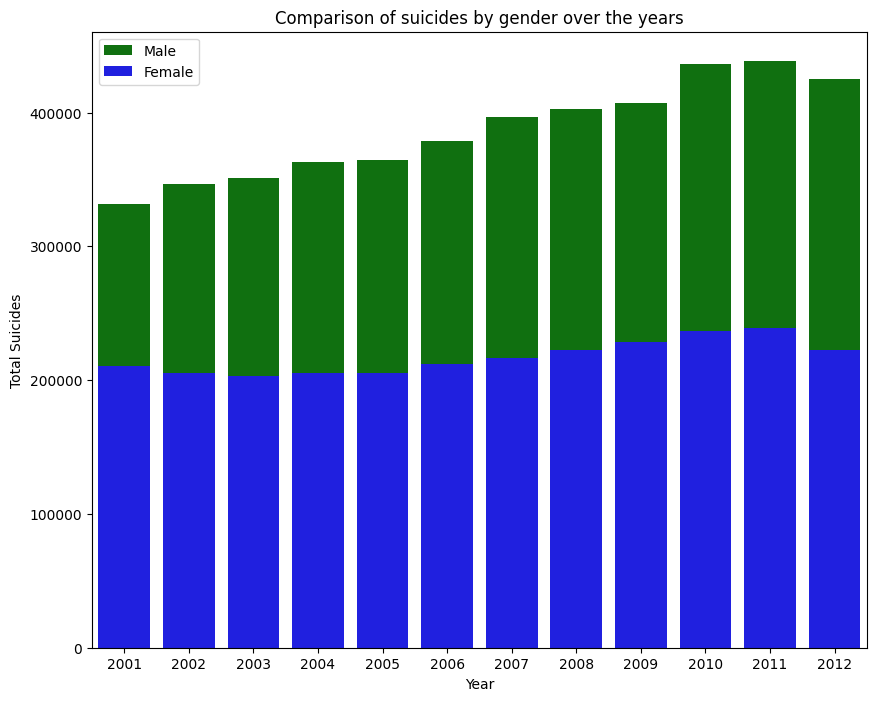

In [29]:
# Visualization of suicides by gender over the years
plt.figure(figsize=(10, 8))
sns.barplot(x='Year', y='Male', data=gender_year, color='green', label='Male')
sns.barplot(x='Year', y='Female', data=gender_year, color='blue', label='Female')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Comparison of suicides by gender over the years')
plt.legend()
plt.show();

### Most prevalent causes of suicides

In [30]:
suicide_causes = df[df['Type_code'] == 'Causes']
suicide_causes.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [31]:
type_total = suicide_causes[['Type', 'Total']].groupby('Type', as_index=False).sum().sort_values('Total', ascending=False).head(10)
type_total.head()

,Type,Total
11,Family Problems,341952
4,Causes Not known,237069
19,Other Causes (Please Specity),216050
20,Other Prolonged Illness,194565
15,Insanity/Mental Illness,94229


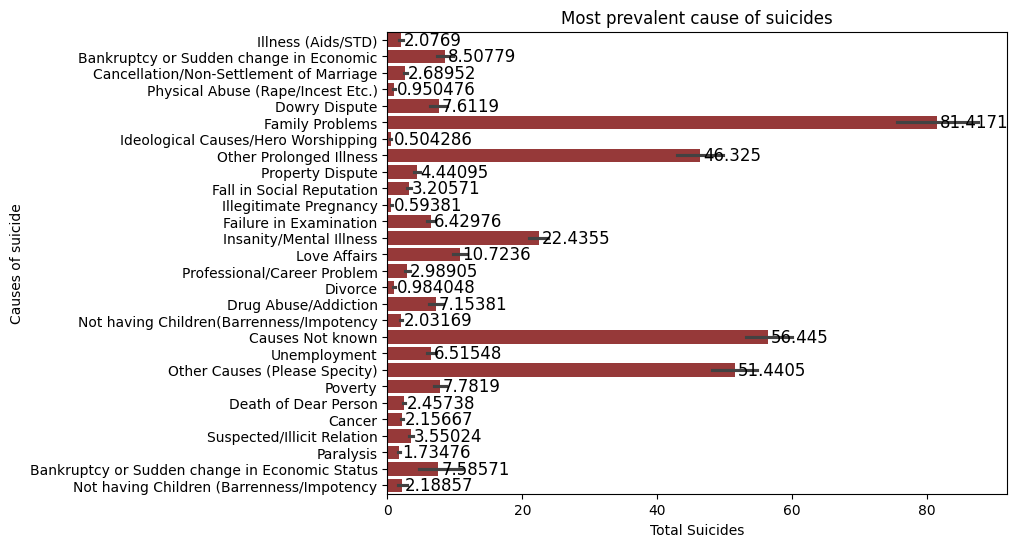

In [32]:
# Most prevalent causes of suicides
plt.figure(figsize=(8, 6))
labels = sns.barplot(x='Total', y='Type', data= suicide_causes, color='brown')
labels.bar_label(labels.containers[0], padding=2, size=12)
plt.title('Most prevalent cause of suicides')
plt.xlabel('Total Suicides')
plt.ylabel('Causes of suicide')
plt.show();

### Age group suicide comparison

In [33]:
# Deleting the 0-100+ row since it is the sum of all the other rows combined
unwanted_age = ['0-100+']
age_to_drop = df[df['Age_group'].isin(unwanted_age)].index
df = df.drop(age_to_drop)

df['Age_group']

0         0-14
1         0-14
2         0-14
3         0-14
4         0-14
          ... 
237504     60+
237505     60+
237506     60+
237507     60+
237508     60+
Name: Age_group, Length: 225663, dtype: object

In [34]:
age_total = df[['Age_group', 'Total']].groupby(['Age_group']).sum()
age_total

,Total
Age_group,
0-14,98410
15-29,1534037
30-44,1471599
45-59,885177
60+,346925


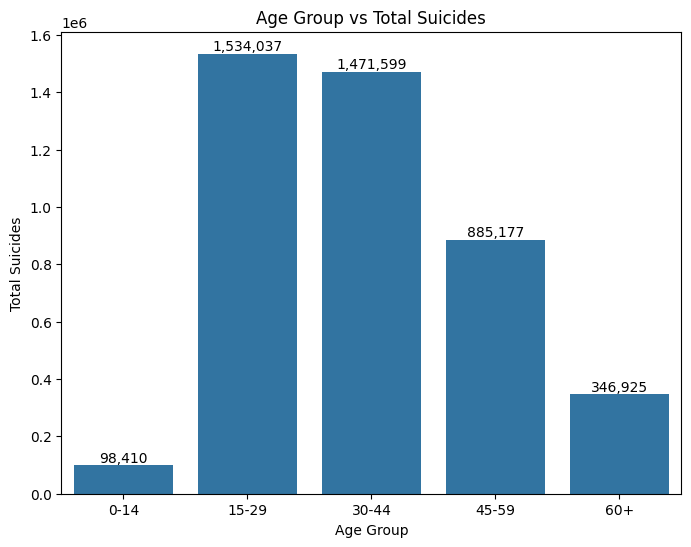

In [45]:
# Age group comparison
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Age_group', y='Total', data=age_total)

# Adding value labels on the bars
for bar, total in zip(ax.patches, age_total['Total']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{total:,}', 
            ha='center', va='bottom', fontsize=10)

plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.title('Age Group vs Total Suicides')
plt.show()

### Suicide by means adopted

In [36]:
suicide_means = df[df['Type_code'] == 'Means_adopted']
suicide_means.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
276,A & N Islands,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
278,A & N Islands,2001,Means_adopted,By Jumping from (Other sites),Female,0-14,0
279,A & N Islands,2001,Means_adopted,By touching electric wires,Female,0-14,0
280,A & N Islands,2001,Means_adopted,By Machine,Female,0-14,0


In [37]:
type_causes = suicide_means[['Type', 'Total']].groupby('Type', as_index=False).sum().sort_values('Total',ascending=False)
type_causes.head()

,Type,Total
5,By Hanging,460955
0,By Consuming Insecticides,275501
1,By Consuming Other Poison,231178
11,By Other means (please specify),135132
4,By Fire/Self Immolation,128006


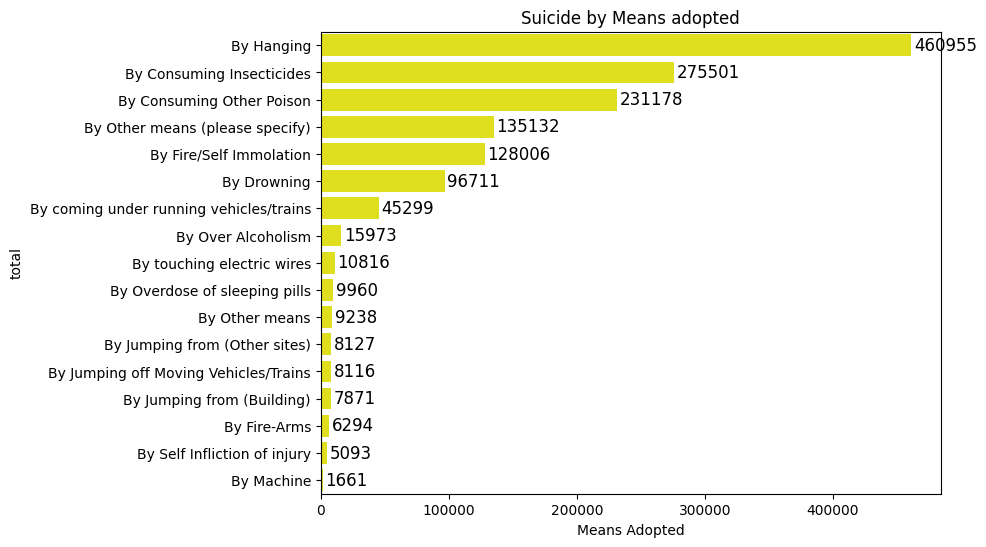

In [38]:
# Visualization of the Type by total
plt.figure(figsize=(8, 6))
label = sns.barplot(x='Total', y='Type', data=type_causes, color='yellow')
label.bar_label(label.containers[0], padding=2, size=12)
plt.xlabel('Means Adopted')
plt.ylabel('total')
plt.title('Suicide by Means adopted')
plt.show();

### Suicide by professional profile

In [39]:
suicide_profession = df[df['Type_code'] == 'Professional_Profile'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()
suicide_profession.head()

,Type,Gender,Total
0,Farming/Agriculture Activity,Female,27300
1,Farming/Agriculture Activity,Male,170623
2,House Wife,Female,285243
3,House Wife,Male,0
4,Others (Please Specify),Female,111191


<Figure size 800x600 with 0 Axes>

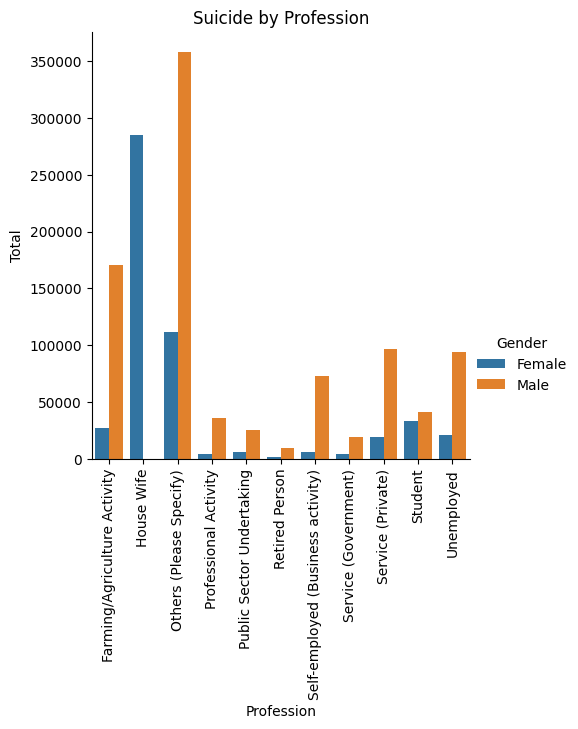

In [40]:
# Visualization of suicide_profession by professional profile
plt.figure(figsize=(8, 6))
labels = sns.catplot(x='Type', y='Total', kind='bar',hue='Gender', data=suicide_profession)
labels.set_xticklabels(rotation=90)
plt.xlabel('Profession')
plt.ylabel('Total')
plt.title('Suicide by Profession')
plt.show()

### Suicide by Education status

In [48]:
suicide_educ = df[df['Type_code'] == 'Education_Status'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()
suicide_educ.head()

,Type,Gender,Total
0,Diploma,Female,11202
1,Diploma,Male,31257
2,Graduate,Female,29052
3,Graduate,Male,64770
4,Hr. Secondary/Intermediate/Pre-Universit,Female,118218


In [49]:
# Convert 'suicide_educ' to Plotly DataFrame format
suicide_educ_plotly = pd.DataFrame(suicide_educ)

# Create the bar plot using Plotly Express
fig = px.bar(suicide_educ_plotly,
            x='Type', y='Total',
            color='Gender',
            barmode='group',
            text='Total',
            title='Suicide by Education Status',
            labels={'Type': 'Education Status', 'Total': 'Total Suicides', 'Gender': 'Gender'}
)

# Update layout for better visualization
fig.update_layout(xaxis_tickangle=-45, xaxis_title='', yaxis_title='Total Suicides')

# Display the figure
fig.show()


### Suicide by social status and gender

In [50]:
suicide_status = df[df['Type_code'] == 'Social_Status'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()
suicide_status.head()

,Type,Gender,Total
0,Divorcee,Female,23076
1,Divorcee,Male,22740
2,Married,Female,1070301
3,Married,Male,1995021
4,Never Married,Female,346380


In [51]:
# Convert 'suicide_status' to Plotly DataFrame format
suicide_status_plotly = pd.DataFrame(suicide_status)

# Create the bar plot using Plotly Express
fig = px.bar(suicide_status_plotly,
             x='Type',
             y='Total',
             color='Gender',
             barmode='group',
             text='Total',
             title='Total Suicides by Social Status and Gender',
             labels={'Type': 'Social Status', 'Total': 'Total Suicides', 'Gender': 'Gender'}
)

# Update layout for better visualization
fig.update_layout(xaxis_tickangle=-45, xaxis_title='', yaxis_title='Total Suicides')

# Display the figure
fig.show()
